<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#SARSA-(on-policy-TD-control)-for-estimating-Q-$\approx-q_*$" data-toc-modified-id="SARSA-(on-policy-TD-control)-for-estimating-Q-$\approx-q_*$-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>SARSA (on-policy TD control) for estimating Q $\approx q_*$</a></span></li><li><span><a href="#WindyGridWorld-Envionment-/-Agent-구현" data-toc-modified-id="WindyGridWorld-Envionment-/-Agent-구현-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>WindyGridWorld Envionment / Agent 구현</a></span></li><li><span><a href="#WindyGridWorld-실험" data-toc-modified-id="WindyGridWorld-실험-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>WindyGridWorld 실험</a></span></li><li><span><a href="#Q-Table" data-toc-modified-id="Q-Table-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Q Table</a></span></li><li><span><a href="#WindyGridWorld-결과-시각화" data-toc-modified-id="WindyGridWorld-결과-시각화-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>WindyGridWorld 결과 시각화</a></span></li><li><span><a href="#WindyGridWorld-결과-분석/해석" data-toc-modified-id="WindyGridWorld-결과-분석/해석-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>WindyGridWorld 결과 분석/해석</a></span></li></ul></div>

### SARSA (on-policy TD control) for estimating Q $\approx q_*$

- Initialize $Q(s, a)$, for all $s \in \mathcal{S}, a \in \mathcal{A}(s)$, arbitrarily, and $Q($ terminal-state,$\cdot)=0$ 

- Repeat (for each episode):
    - Initialize $S$ 
    - Choose $A$ from $S$ using policy derived from $Q$ (e.g., $\epsilon$ -greedy $)$
    - Repeat (for each step of episode):
        - Take action $A$, observe $R, S^{\prime}$ 
        - Choose $A^{\prime}$ from $S^{\prime}$ using policy derived from $Q$ (e.g., $\epsilon$ -greedy)
        - $Q(S, A) \leftarrow Q(S, A)+\alpha\left[R+\gamma Q\left(S^{\prime}, A^{\prime}\right)-Q(S, A)\right]$
        - $S \leftarrow S^{\prime}$
        - $A \leftarrow A^{\prime}$
    - until $S$ is terminal

### WindyGridWorld Envionment / Agent 구현

> `WindyGridWorld` class에 `environment`, `agent` 같이 구현

- $\alpha = 0.5$ (alpha)
- $\epsilon = 0.1$ (epsilon)
- $\gamma = 0.9$ (discount_factor)

In [119]:
import numpy as np
import matplotlib.pyplot as plt

In [123]:
class WindyGridWorld():
    def __init__(self, state, alpha = 0.5, discount_factor = 0.9, epsilon = 0.1):
        self.state = state                  # np.zeros([7, 10]) 
        self.q_table = np.zeros([4, 7, 10]) # q_table # np.zeros([4, 7, 10]) # 갯수 : action * state
        self.terminated = False             # Terminal 도착시 다음 Episode로 돌도록 조건 설정
        self.alpha = alpha                  # step size
        self.actions = np.arange(4)         # (0 : up, 1 : down, 2 : reft, 3 : right)
        self.discount_factor = discount_factor
        self.epsilon = epsilon              
        self.row = 3                        # Initial location (state) is row (y)
        self.column = 0                     # Initial location (state) is column (x)
    
    
    # epsilon greedy policy에 따라 action 반환
    def get_action_with_e_greedy(self, state):
        p = np.random.random()              # 0 ~ 1의 범위를 가지는 uniform distribution에서 p 추출
        if p < self.epsilon:
            # 무작위 행동 반환
            action = np.random.choice(len(self.actions))
            return action
        else:
            
            # 방법 1 : 가장 큰 값이 여러개인 경우 첫번째 indew만 출력
            state_action = self.q_table[:, state[0], state[1]]
            action = np.argmax(state_action)
            
            # 방법 2 : 가장 큰 값이 여러개인 경우 random하게 뽑음
            # 큐함수에 따른 행동 반환
#             state_action = self.q_table[:, state[0], state[1]]
#             action = np.random.choice(np.where(state_action == state_action.max())[0])
            return action
    
    def take_action(self, action):
        
        # up 
        if action == 0:
            if self.column in [0, 1, 2, 9]:
                self.row -= 1
            elif self.column in [3, 4, 5, 8]:
                self.row -= 2
            elif self.column in [6, 7]:
                self.row -= 3
        # down
        elif action == 1:
            if self.column in [0, 1, 2, 9]:
                self.row += 1
            elif self.column in [3, 4, 5, 8]:
                self.row += 0
            elif self.column in [6, 7]:
                self.row -= 1
        # left
        elif action == 2:
            if self.column in [0, 1, 2, 9]:
                self.column -= 1
                self.row += 0
            elif self.column in [3, 4, 5, 8]:
                self.column -= 1                
                self.row -= 1
            elif self.column in [6, 7]:
                self.column -= 1   
                self.row -= 2
        # right
        elif action == 3:
            if self.column in [0, 1, 2, 9]:
                self.column += 1
                self.row += 0
            elif self.column in [3, 4, 5, 8]:
                self.column += 1                        
                self.row -= 1
            elif self.column in [6, 7]:
                self.column += 1                
                self.row -= 2
        
        # 이동 후 왼쪽 및 오른쪽 벽에 부딪친 경우
        if self.column in [-1]:
            self.column = 0
        elif self.column in [10]:
            self.column = 9
            
        # 이동 후 위 및 아래 벽에 부딪친 경우          
        if self.row in [-3, -2, -1]:
            self.row = 0
        elif self.row in [7]:
            self.row = 6
        
        # Terminal에 도달한 경우 self.terminated를 True로 설정
        if self.state[self.row][self.column] == 2.0:
            self.terminated = True
            print('Terminated')
        
        
    # <s, a, r, s', a'>의 샘플로부터 큐함수를 업데이트
    def learn_with_SARSA(self, state, action, reward, next_state, next_action):
        # 현재 state, action의 q value
        current_state_q = self.q_table[action, state[0], state[1]]
        # 다음 state, action의 q value        
        next_state_q = self.q_table[next_action, next_state[0], next_state[1]]
        # update q value
        new_q = (current_state_q + self.alpha * (reward + self.discount_factor * next_state_q - current_state_q))
        self.q_table[action, state[0], state[1]] = new_q
        

### WindyGridWorld 실험

- episode = 100
- reward = -1

In [126]:
# state 정의
state = np.zeros([7, 10]) # height x width 크기의 state
state[3][0] = 1           # start value
state[3][6] = 2           # terminal check value

# WindyGridWorld 초기화
wgr = WindyGridWorld(state)

reward = -1

episodes = 200
step = 1

# time steps 및 episodes 이력 저장
step_list = []
episode_list = []


# 설정된 episode 만큼 iteration
for episode in range(episodes):
    
    # Episode 마다 WindyGridWorld 상태를 초기화 (반드시 q_table은 유지)
    wgr.row, wgr.column = 3, 0
    wgr.terminated = False
    
    # step에 따른 큐함수 update 과정 (Terminal에 도착하면 windy_grid_world.terminated = True로 while 탈출)
    while not wgr.terminated:
        
        # current state
        state = [wgr.row, wgr.column]
        # current action
        action = wgr.get_action_with_e_greedy(state)
        # current state에서 action으로 인한 state 이동
        wgr.take_action(action)
    
        # next_state
        next_state = [wgr.row, wgr.column]
        # next_action
        next_action = wgr.get_action_with_e_greedy(next_state)
        # wgr.take_action(next_action)
   
        # <s, a, r, s', a'>의 샘플로부터 SARSA algorithms에 의한 큐함수를 업데이트
        wgr.learn_with_SARSA(state, action, reward, next_state, next_action)

        print("step : {} \nstate : ({},{}), action : {}".format(step, state[0], state[1], action))
        print("next_state : ({},{}), next_action : {}".format(next_state[0], next_state[1], next_action))

        print('-----------------------------------')
        step += 1
        
        # episode 및 step log(이력) 저장
        step_list.append(step)
        episode_list.append(episode)
        
#         if step == 100:
#             break

step : 1 
state : (3,0), action : 1
next_state : (4,0), next_action : 1
-----------------------------------
step : 2 
state : (4,0), action : 0
next_state : (3,0), next_action : 0
-----------------------------------
step : 3 
state : (3,0), action : 0
next_state : (2,0), next_action : 3
-----------------------------------
step : 4 
state : (2,0), action : 0
next_state : (1,0), next_action : 0
-----------------------------------
step : 5 
state : (1,0), action : 0
next_state : (0,0), next_action : 0
-----------------------------------
step : 6 
state : (0,0), action : 0
next_state : (0,0), next_action : 0
-----------------------------------
step : 7 
state : (0,0), action : 1
next_state : (1,0), next_action : 1
-----------------------------------
step : 8 
state : (1,0), action : 1
next_state : (2,0), next_action : 1
-----------------------------------
step : 9 
state : (2,0), action : 1
next_state : (3,0), next_action : 2
-----------------------------------
step : 10 
state : (3,0), ac

-----------------------------------
step : 687 
state : (4,2), action : 3
next_state : (4,3), next_action : 1
-----------------------------------
step : 688 
state : (4,3), action : 1
next_state : (4,3), next_action : 1
-----------------------------------
step : 689 
state : (4,3), action : 3
next_state : (3,4), next_action : 1
-----------------------------------
step : 690 
state : (3,4), action : 1
next_state : (3,4), next_action : 1
-----------------------------------
step : 691 
state : (3,4), action : 2
next_state : (2,3), next_action : 3
-----------------------------------
step : 692 
state : (2,3), action : 3
next_state : (1,4), next_action : 1
-----------------------------------
step : 693 
state : (1,4), action : 1
next_state : (1,4), next_action : 1
-----------------------------------
step : 694 
state : (1,4), action : 1
next_state : (1,4), next_action : 1
-----------------------------------
step : 695 
state : (1,4), action : 1
next_state : (1,4), next_action : 1
----------

next_state : (1,9), next_action : 3
-----------------------------------
step : 1354 
state : (1,9), action : 1
next_state : (2,9), next_action : 1
-----------------------------------
step : 1355 
state : (2,9), action : 3
next_state : (2,9), next_action : 1
-----------------------------------
step : 1356 
state : (2,9), action : 1
next_state : (3,9), next_action : 2
-----------------------------------
step : 1357 
state : (3,9), action : 2
next_state : (3,8), next_action : 1
-----------------------------------
step : 1358 
state : (3,8), action : 1
next_state : (3,8), next_action : 1
-----------------------------------
step : 1359 
state : (3,8), action : 3
next_state : (2,9), next_action : 1
-----------------------------------
step : 1360 
state : (2,9), action : 1
next_state : (3,9), next_action : 2
-----------------------------------
step : 1361 
state : (3,9), action : 2
next_state : (3,8), next_action : 2
-----------------------------------
step : 1362 
state : (3,8), action : 2
n

-----------------------------------
step : 2020 
state : (1,6), action : 2
next_state : (0,5), next_action : 2
-----------------------------------
step : 2021 
state : (0,5), action : 2
next_state : (0,4), next_action : 2
-----------------------------------
step : 2022 
state : (0,4), action : 0
next_state : (0,4), next_action : 0
-----------------------------------
step : 2023 
state : (0,4), action : 2
next_state : (0,3), next_action : 3
-----------------------------------
step : 2024 
state : (0,3), action : 3
next_state : (0,4), next_action : 1
-----------------------------------
step : 2025 
state : (0,4), action : 1
next_state : (0,4), next_action : 1
-----------------------------------
step : 2026 
state : (0,4), action : 2
next_state : (0,3), next_action : 2
-----------------------------------
step : 2027 
state : (0,3), action : 2
next_state : (0,2), next_action : 2
-----------------------------------
step : 2028 
state : (0,2), action : 2
next_state : (0,1), next_action : 0
-

next_state : (4,2), next_action : 1
-----------------------------------
step : 2686 
state : (4,2), action : 2
next_state : (4,1), next_action : 1
-----------------------------------
step : 2687 
state : (4,1), action : 1
next_state : (5,1), next_action : 2
-----------------------------------
step : 2688 
state : (5,1), action : 3
next_state : (5,2), next_action : 1
-----------------------------------
step : 2689 
state : (5,2), action : 3
next_state : (5,3), next_action : 3
-----------------------------------
step : 2690 
state : (5,3), action : 3
next_state : (4,4), next_action : 3
-----------------------------------
step : 2691 
state : (4,4), action : 3
next_state : (3,5), next_action : 1
-----------------------------------
step : 2692 
state : (3,5), action : 1
next_state : (3,5), next_action : 1
-----------------------------------
step : 2693 
state : (3,5), action : 3
next_state : (2,6), next_action : 3
-----------------------------------
step : 2694 
state : (2,6), action : 3
n

next_state : (3,1), next_action : 0
-----------------------------------
step : 3349 
state : (3,1), action : 0
next_state : (2,1), next_action : 2
-----------------------------------
step : 3350 
state : (2,1), action : 2
next_state : (2,0), next_action : 0
-----------------------------------
step : 3351 
state : (2,0), action : 0
next_state : (1,0), next_action : 1
-----------------------------------
step : 3352 
state : (1,0), action : 1
next_state : (2,0), next_action : 3
-----------------------------------
step : 3353 
state : (2,0), action : 1
next_state : (3,0), next_action : 0
-----------------------------------
step : 3354 
state : (3,0), action : 0
next_state : (2,0), next_action : 3
-----------------------------------
step : 3355 
state : (2,0), action : 3
next_state : (2,1), next_action : 3
-----------------------------------
step : 3356 
state : (2,1), action : 0
next_state : (1,1), next_action : 1
-----------------------------------
step : 3357 
state : (1,1), action : 1
n

step : 4046 
state : (5,7), action : 2
next_state : (3,6), next_action : 0
-----------------------------------
step : 4047 
state : (3,0), action : 1
next_state : (4,0), next_action : 1
-----------------------------------
step : 4048 
state : (4,0), action : 1
next_state : (5,0), next_action : 3
-----------------------------------
step : 4049 
state : (5,0), action : 3
next_state : (5,1), next_action : 1
-----------------------------------
step : 4050 
state : (5,1), action : 3
next_state : (5,2), next_action : 1
-----------------------------------
step : 4051 
state : (5,2), action : 1
next_state : (6,2), next_action : 2
-----------------------------------
step : 4052 
state : (6,2), action : 3
next_state : (6,3), next_action : 1
-----------------------------------
step : 4053 
state : (6,3), action : 1
next_state : (6,3), next_action : 1
-----------------------------------
step : 4054 
state : (6,3), action : 1
next_state : (6,3), next_action : 1
-----------------------------------
s

state : (1,1), action : 3
next_state : (1,2), next_action : 0
-----------------------------------
step : 4663 
state : (1,2), action : 2
next_state : (1,1), next_action : 1
-----------------------------------
step : 4664 
state : (1,1), action : 1
next_state : (2,1), next_action : 3
-----------------------------------
step : 4665 
state : (2,1), action : 3
next_state : (2,2), next_action : 0
-----------------------------------
step : 4666 
state : (2,2), action : 0
next_state : (1,2), next_action : 1
-----------------------------------
step : 4667 
state : (1,2), action : 1
next_state : (2,2), next_action : 1
-----------------------------------
step : 4668 
state : (2,2), action : 1
next_state : (3,2), next_action : 1
-----------------------------------
step : 4669 
state : (3,2), action : 1
next_state : (4,2), next_action : 3
-----------------------------------
step : 4670 
state : (4,2), action : 3
next_state : (4,3), next_action : 1
-----------------------------------
step : 4671 
s

next_state : (4,2), next_action : 1
-----------------------------------
step : 5384 
state : (4,2), action : 1
next_state : (5,2), next_action : 1
-----------------------------------
step : 5385 
state : (5,2), action : 1
next_state : (6,2), next_action : 3
-----------------------------------
step : 5386 
state : (6,2), action : 3
next_state : (6,3), next_action : 3
-----------------------------------
step : 5387 
state : (6,3), action : 3
next_state : (5,4), next_action : 3
-----------------------------------
step : 5388 
state : (5,4), action : 3
next_state : (4,5), next_action : 3
-----------------------------------
Terminated
step : 5389 
state : (4,5), action : 3
next_state : (3,6), next_action : 0
-----------------------------------
step : 5390 
state : (3,0), action : 3
next_state : (3,1), next_action : 2
-----------------------------------
step : 5391 
state : (3,1), action : 1
next_state : (4,1), next_action : 3
-----------------------------------
step : 5392 
state : (4,1), a

next_state : (4,1), next_action : 3
-----------------------------------
step : 6031 
state : (4,1), action : 3
next_state : (4,2), next_action : 1
-----------------------------------
step : 6032 
state : (4,2), action : 1
next_state : (5,2), next_action : 1
-----------------------------------
step : 6033 
state : (5,2), action : 1
next_state : (6,2), next_action : 3
-----------------------------------
step : 6034 
state : (6,2), action : 3
next_state : (6,3), next_action : 1
-----------------------------------
step : 6035 
state : (6,3), action : 1
next_state : (6,3), next_action : 1
-----------------------------------
step : 6036 
state : (6,3), action : 1
next_state : (6,3), next_action : 1
-----------------------------------
step : 6037 
state : (6,3), action : 3
next_state : (5,4), next_action : 3
-----------------------------------
step : 6038 
state : (5,4), action : 3
next_state : (4,5), next_action : 3
-----------------------------------
step : 6039 
state : (4,5), action : 2
n

### Q Table 

In [135]:
wgr.q_table

array([[[-6.83229917, -6.9626588 , -7.00917442, -7.22286619,
         -7.47548797, -7.56288429, -7.35957694, -7.19156794,
         -6.82639273, -6.54208785],
        [-6.79099408, -6.69972919, -6.9656054 , -7.32276869,
         -7.26916169, -7.3585633 , -7.08040786, -5.90265795,
         -6.51288043, -6.46453797],
        [-6.70378165, -6.66612332, -6.62697075, -7.14171957,
         -6.72179211, -6.77436481, -5.97878701, -6.05596622,
         -5.45910582, -5.89087436],
        [-6.83902493, -6.55412611, -6.62922968, -6.61508465,
         -7.18055026, -5.49652956,  0.        , -5.36757999,
         -4.95075527, -4.83151155],
        [-6.60126149, -6.50904502, -6.21259063, -6.4940049 ,
         -5.93225586, -6.57660966,  0.        , -3.78974831,
         -4.64467141, -4.3539827 ],
        [-6.50587548, -6.01620075, -5.60183124, -5.93160702,
         -6.35886634,  0.        ,  0.        , -1.55759548,
         -4.03134733, -4.16316649],
        [-6.16090104, -6.08018366, -5.39568535, -6.4

### WindyGridWorld 결과 시각화 

Text(0, 0.5, 'Episodes')

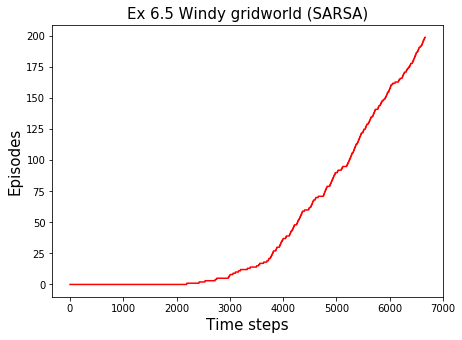

In [127]:
plt.figure(figsize=(7, 5))
plt.plot(step_list, episode_list, color='r')
plt.title("Ex 6.5 Windy gridworld (SARSA)", fontsize=15)
plt.xlabel("Time steps", fontsize=15)
plt.ylabel("Episodes", fontsize=15)

### WindyGridWorld 결과 분석/해석

>  step(x축)이 증가하면서 $\epsilon -greedy$ 를 따르는 SARSA 알고리즘으로 업데이트된 큐함수에 의해 `Terminal`에 도달하는 `step` 주기가 줄어드는 것을 확인할 수 있었다. (즉, step에 따라 terminal에 도달하면, episode가 늘어나는 결과)